<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 168.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 173.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 139.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 140.9 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
#Identify and manage missing values
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


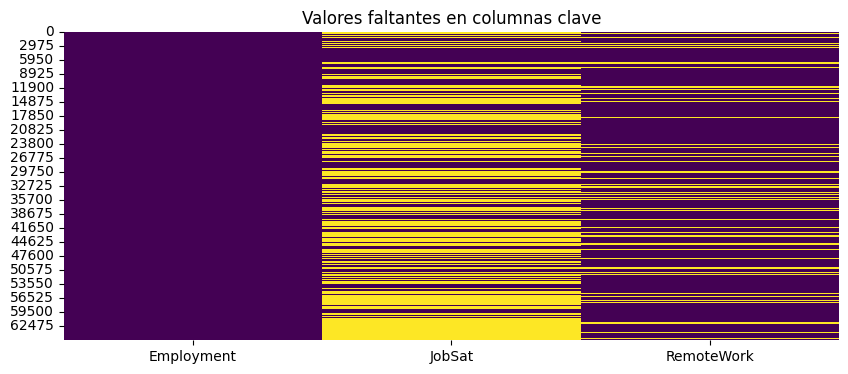

In [4]:
#Heat Map of missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df[['Employment', 'JobSat', 'RemoteWork']].isnull(), cbar=False, cmap='viridis')
plt.title("Valores faltantes en columnas clave")
plt.show()

In [5]:
# Imputar con el valor más frecuente
for column in ['Employment', 'JobSat', 'RemoteWork']:
    most_frequent = df[column].mode()[0]
    df[column].fillna(most_frequent, inplace=True)
    print(f"Se imputaron valores faltantes en '{column}' con: {most_frequent}")

Se imputaron valores faltantes en 'Employment' con: Employed, full-time
Se imputaron valores faltantes en 'JobSat' con: 8.0
Se imputaron valores faltantes en 'RemoteWork' con: Hybrid (some remote, some in-person)


/tmp/ipykernel_299/629612138.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(most_frequent, inplace=True)


In [6]:
print("¿Todavía hay valores faltantes?\n", df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


¿Todavía hay valores faltantes?
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [7]:
# Ver tipo de datos de las columnas
print("Tipos de datos:")
print(df[['YearsCodePro', 'JobSat']].dtypes)

print("\nValores únicos en 'YearsCodePro':")
print(df['YearsCodePro'].unique())

print("\nValores únicos en 'JobSat':")
print(df['JobSat'].unique())

Tipos de datos:
YearsCodePro     object
JobSat          float64
dtype: object

Valores únicos en 'YearsCodePro':
[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']

Valores únicos en 'JobSat':
[ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


/tmp/ipykernel_299/3619658481.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_exp.groupby('ExperienceRange')['JobSat'].median().reset_index()


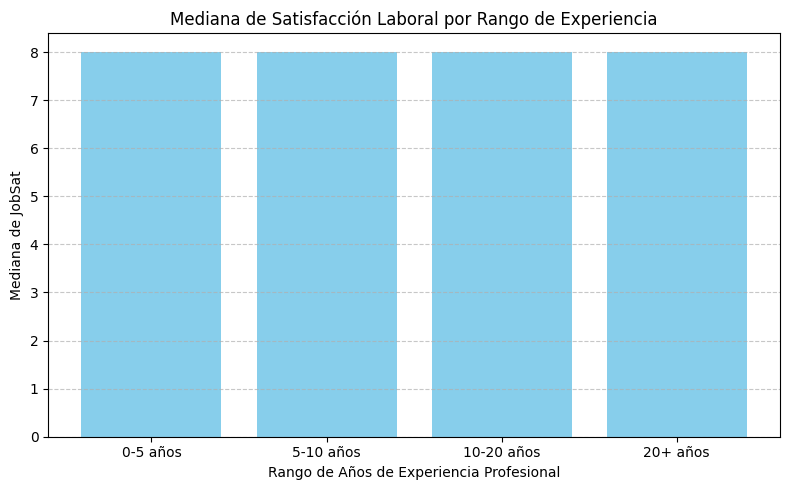

In [8]:
# Copia de seguridad del DataFrame original (opcional)
df_copy = df.copy()

# Reemplazar valores de texto en 'YearsCodePro' y convertir a numérico
df_copy['YearsCodePro'] = df_copy['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

# Convertir a tipo numérico (forzando errores a NaN)
df_copy['YearsCodePro'] = pd.to_numeric(df_copy['YearsCodePro'], errors='coerce')

# Eliminar filas con valores faltantes en YearsCodePro o JobSat
df_exp = df_copy[['YearsCodePro', 'JobSat']].dropna()

# Crear una nueva columna de rangos de experiencia
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 años', '5-10 años', '10-20 años', '20+ años']
df_exp['ExperienceRange'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calcular mediana de JobSat por rango de experiencia
median_satisfaction = df_exp.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Visualizar
plt.figure(figsize=(8, 5))
plt.bar(median_satisfaction['ExperienceRange'], median_satisfaction['JobSat'], color='skyblue')
plt.title('Mediana de Satisfacción Laboral por Rango de Experiencia')
plt.xlabel('Rango de Años de Experiencia Profesional')
plt.ylabel('Mediana de JobSat')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_299/3901325573.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_jobsat, palette='viridis')


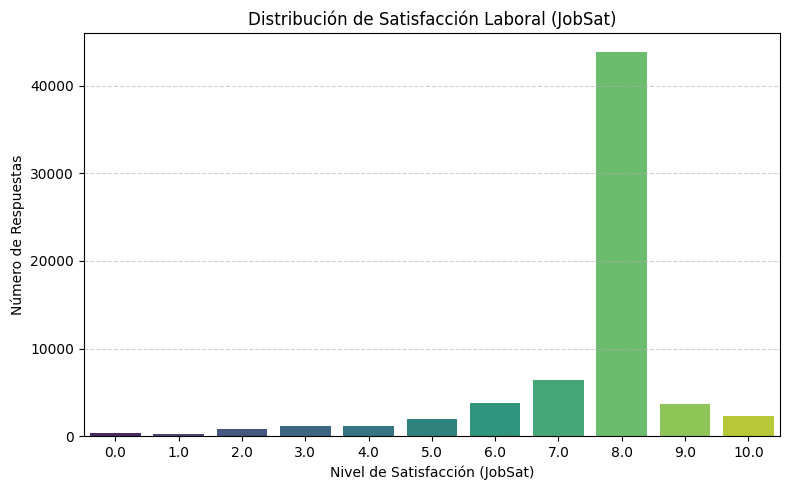

In [9]:
# Filtrar valores no nulos de JobSat
df_jobsat = df['JobSat'].dropna()

# Crear el gráfico de conteo
plt.figure(figsize=(8, 5))
sns.countplot(x=df_jobsat, palette='viridis')

# Personalización del gráfico
plt.title('Distribución de Satisfacción Laboral (JobSat)')
plt.xlabel('Nivel de Satisfacción (JobSat)')
plt.ylabel('Número de Respuestas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_299/1879441348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_remote, palette='coolwarm')


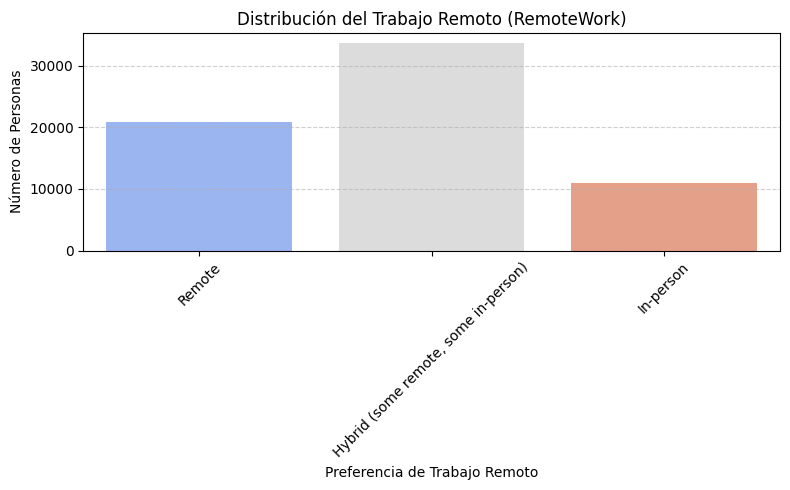

In [10]:
# Filtrar datos no nulos para RemoteWork
df_remote = df['RemoteWork'].dropna()

# Gráfico de conteo
plt.figure(figsize=(8, 5))
sns.countplot(x=df_remote, palette='coolwarm')

# Personalización
plt.title('Distribución del Trabajo Remoto (RemoteWork)')
plt.xlabel('Preferencia de Trabajo Remoto')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Distribución porcentual de trabajo remoto por tipo de empleo:

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                44.30   
Employed, full-time;Employed, part-time                                            40.09   
Employed, full-time;Independent contractor, fre...                                 37.39   
Employed, full-time;Independent contractor, fre...                                 43.48   
Employed, full-time;Independent contractor, fre...                                  0.00   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                 57.14   
Student, full-time;Student, part-time;Retired                                     100.00   
Student, part-tim

/tmp/ipykernel_299/2330515913.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


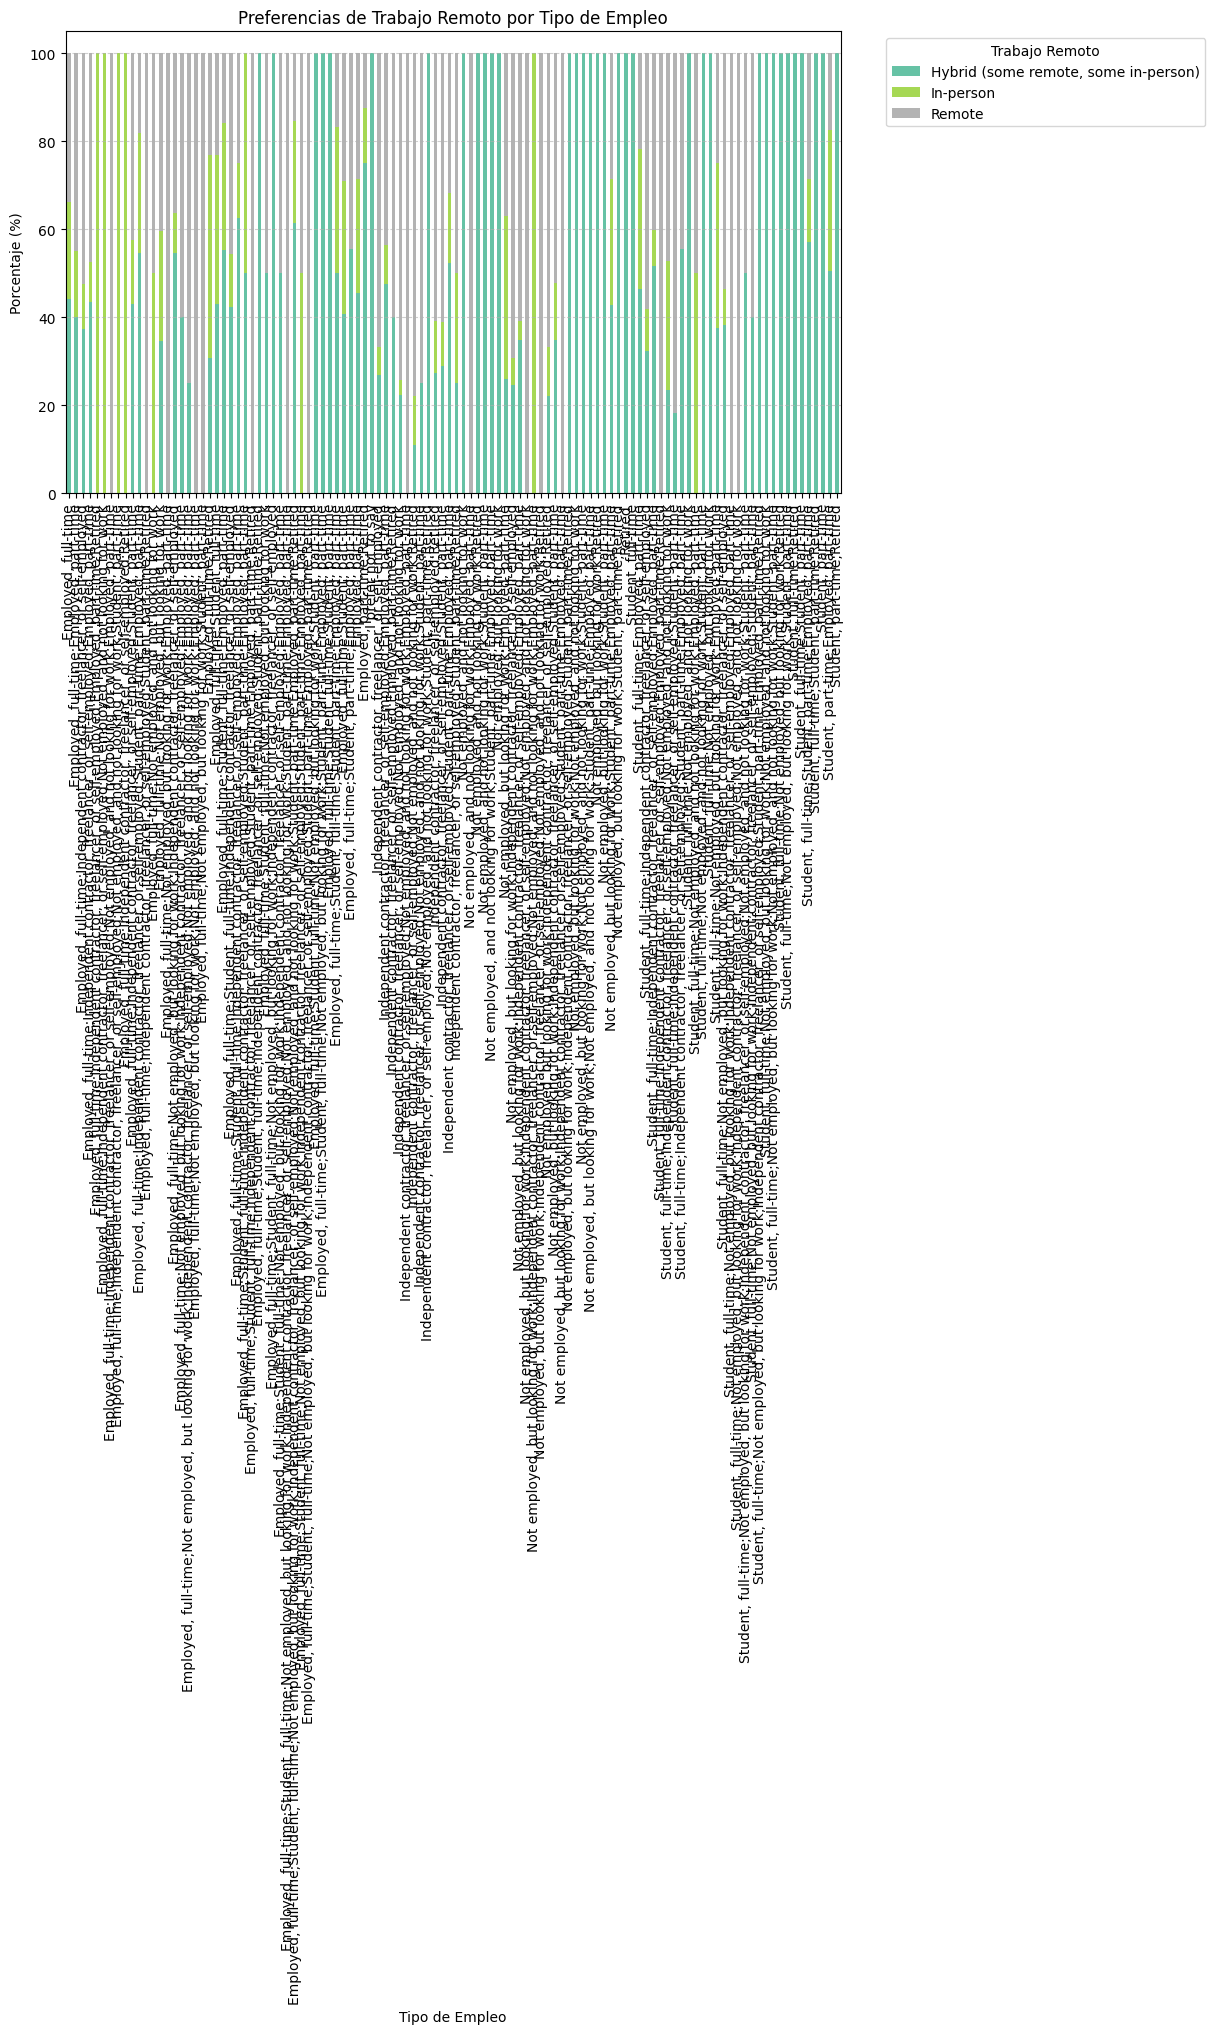

In [11]:
# Crear tabla cruzada
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100

# Mostrar tabla
print("Distribución porcentual de trabajo remoto por tipo de empleo:\n")
print(remote_by_employment.round(2))

# Visualización con gráfico de barras apiladas
remote_by_employment.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))

# Personalización
plt.title('Preferencias de Trabajo Remoto por Tipo de Empleo')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Trabajo Remoto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [12]:
# Filtrar filas donde ambas columnas no sean nulas
lang_region_df = df[['Country', 'LanguageHaveWorkedWith']].dropna()

In [13]:
# Expandir los lenguajes en filas individuales
lang_region_expanded = lang_region_df.assign(
    Language=lang_region_df['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Eliminar espacios extra
lang_region_expanded['Language'] = lang_region_expanded['Language'].str.strip()

In [14]:
# Opción: limitar a los 5 países con más respuestas
top_countries = lang_region_expanded['Country'].value_counts().head(5).index
lang_filtered = lang_region_expanded[lang_region_expanded['Country'].isin(top_countries)]

# Crear tabla cruzada
lang_by_country = pd.crosstab(lang_filtered['Language'], lang_filtered['Country'])

# Ordenar por total de uso
lang_by_country['Total'] = lang_by_country.sum(axis=1)
lang_by_country = lang_by_country.sort_values('Total', ascending=False).drop('Total', axis=1)

# Seleccionar los lenguajes más comunes (e.g., top 10)
top_languages = lang_by_country.head(10)

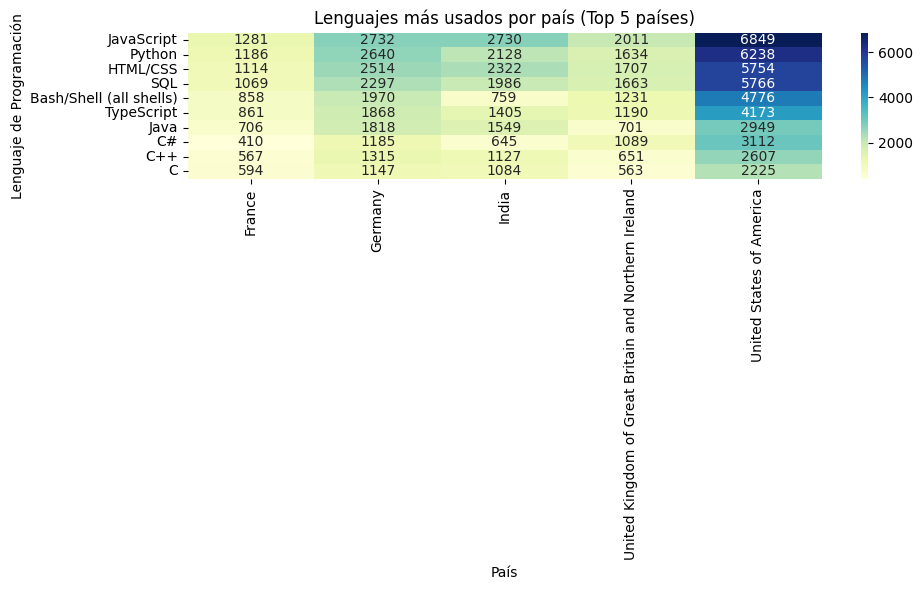

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(top_languages, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Lenguajes más usados por país (Top 5 países)')
plt.xlabel('País')
plt.ylabel('Lenguaje de Programación')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [16]:
# Filtrar filas con datos válidos en ambas columnas
df_corr = df[['YearsCodePro', 'JobSatPoints_1']].dropna()


In [17]:
# Función para convertir valores a numéricos
def clean_experience(value):
    if value == 'Less than 1 year':
        return 0.5
    elif value == 'More than 50 years':
        return 51
    else:
        try:
            return float(value)
        except:
            return None

# Aplicar la conversión
df_corr['YearsCodePro'] = df_corr['YearsCodePro'].apply(clean_experience)

# Eliminar filas con errores de conversión (None)
df_corr = df_corr.dropna()

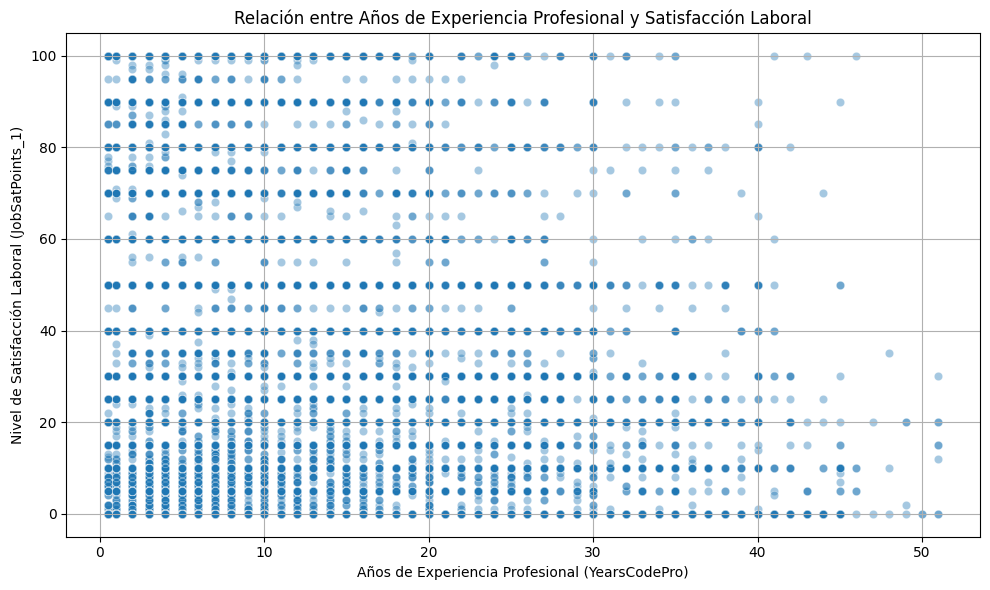

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', alpha=0.4)

plt.title('Relación entre Años de Experiencia Profesional y Satisfacción Laboral')
plt.xlabel('Años de Experiencia Profesional (YearsCodePro)')
plt.ylabel('Nivel de Satisfacción Laboral (JobSatPoints_1)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [19]:
print("Valores faltantes en EdLevel:", df['EdLevel'].isnull().sum())
print("Valores faltantes en Employment:", df['Employment'].isnull().sum())

Valores faltantes en EdLevel: 4653
Valores faltantes en Employment: 0


In [20]:
df_edu_emp = df[['EdLevel', 'Employment']].dropna()

In [21]:
edu_emp_ct = pd.crosstab(df_edu_emp['EdLevel'], df_edu_emp['Employment'], normalize='index')  # porcentajes por nivel educativo
print(edu_emp_ct.head())

Employment                                       Employed, full-time  \
EdLevel                                                                
Associate degree (A.A., A.S., etc.)                         0.590630   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                0.673803   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)             0.707784   
Primary/elementary school                                   0.139616   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)              0.697980   

Employment                                       Employed, full-time;Employed, part-time  \
EdLevel                                                                                    
Associate degree (A.A., A.S., etc.)                                             0.005020   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                    0.003608   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                 0.003921   
Primary/elementary school          

/tmp/ipykernel_299/3017067745.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x700 with 0 Axes>

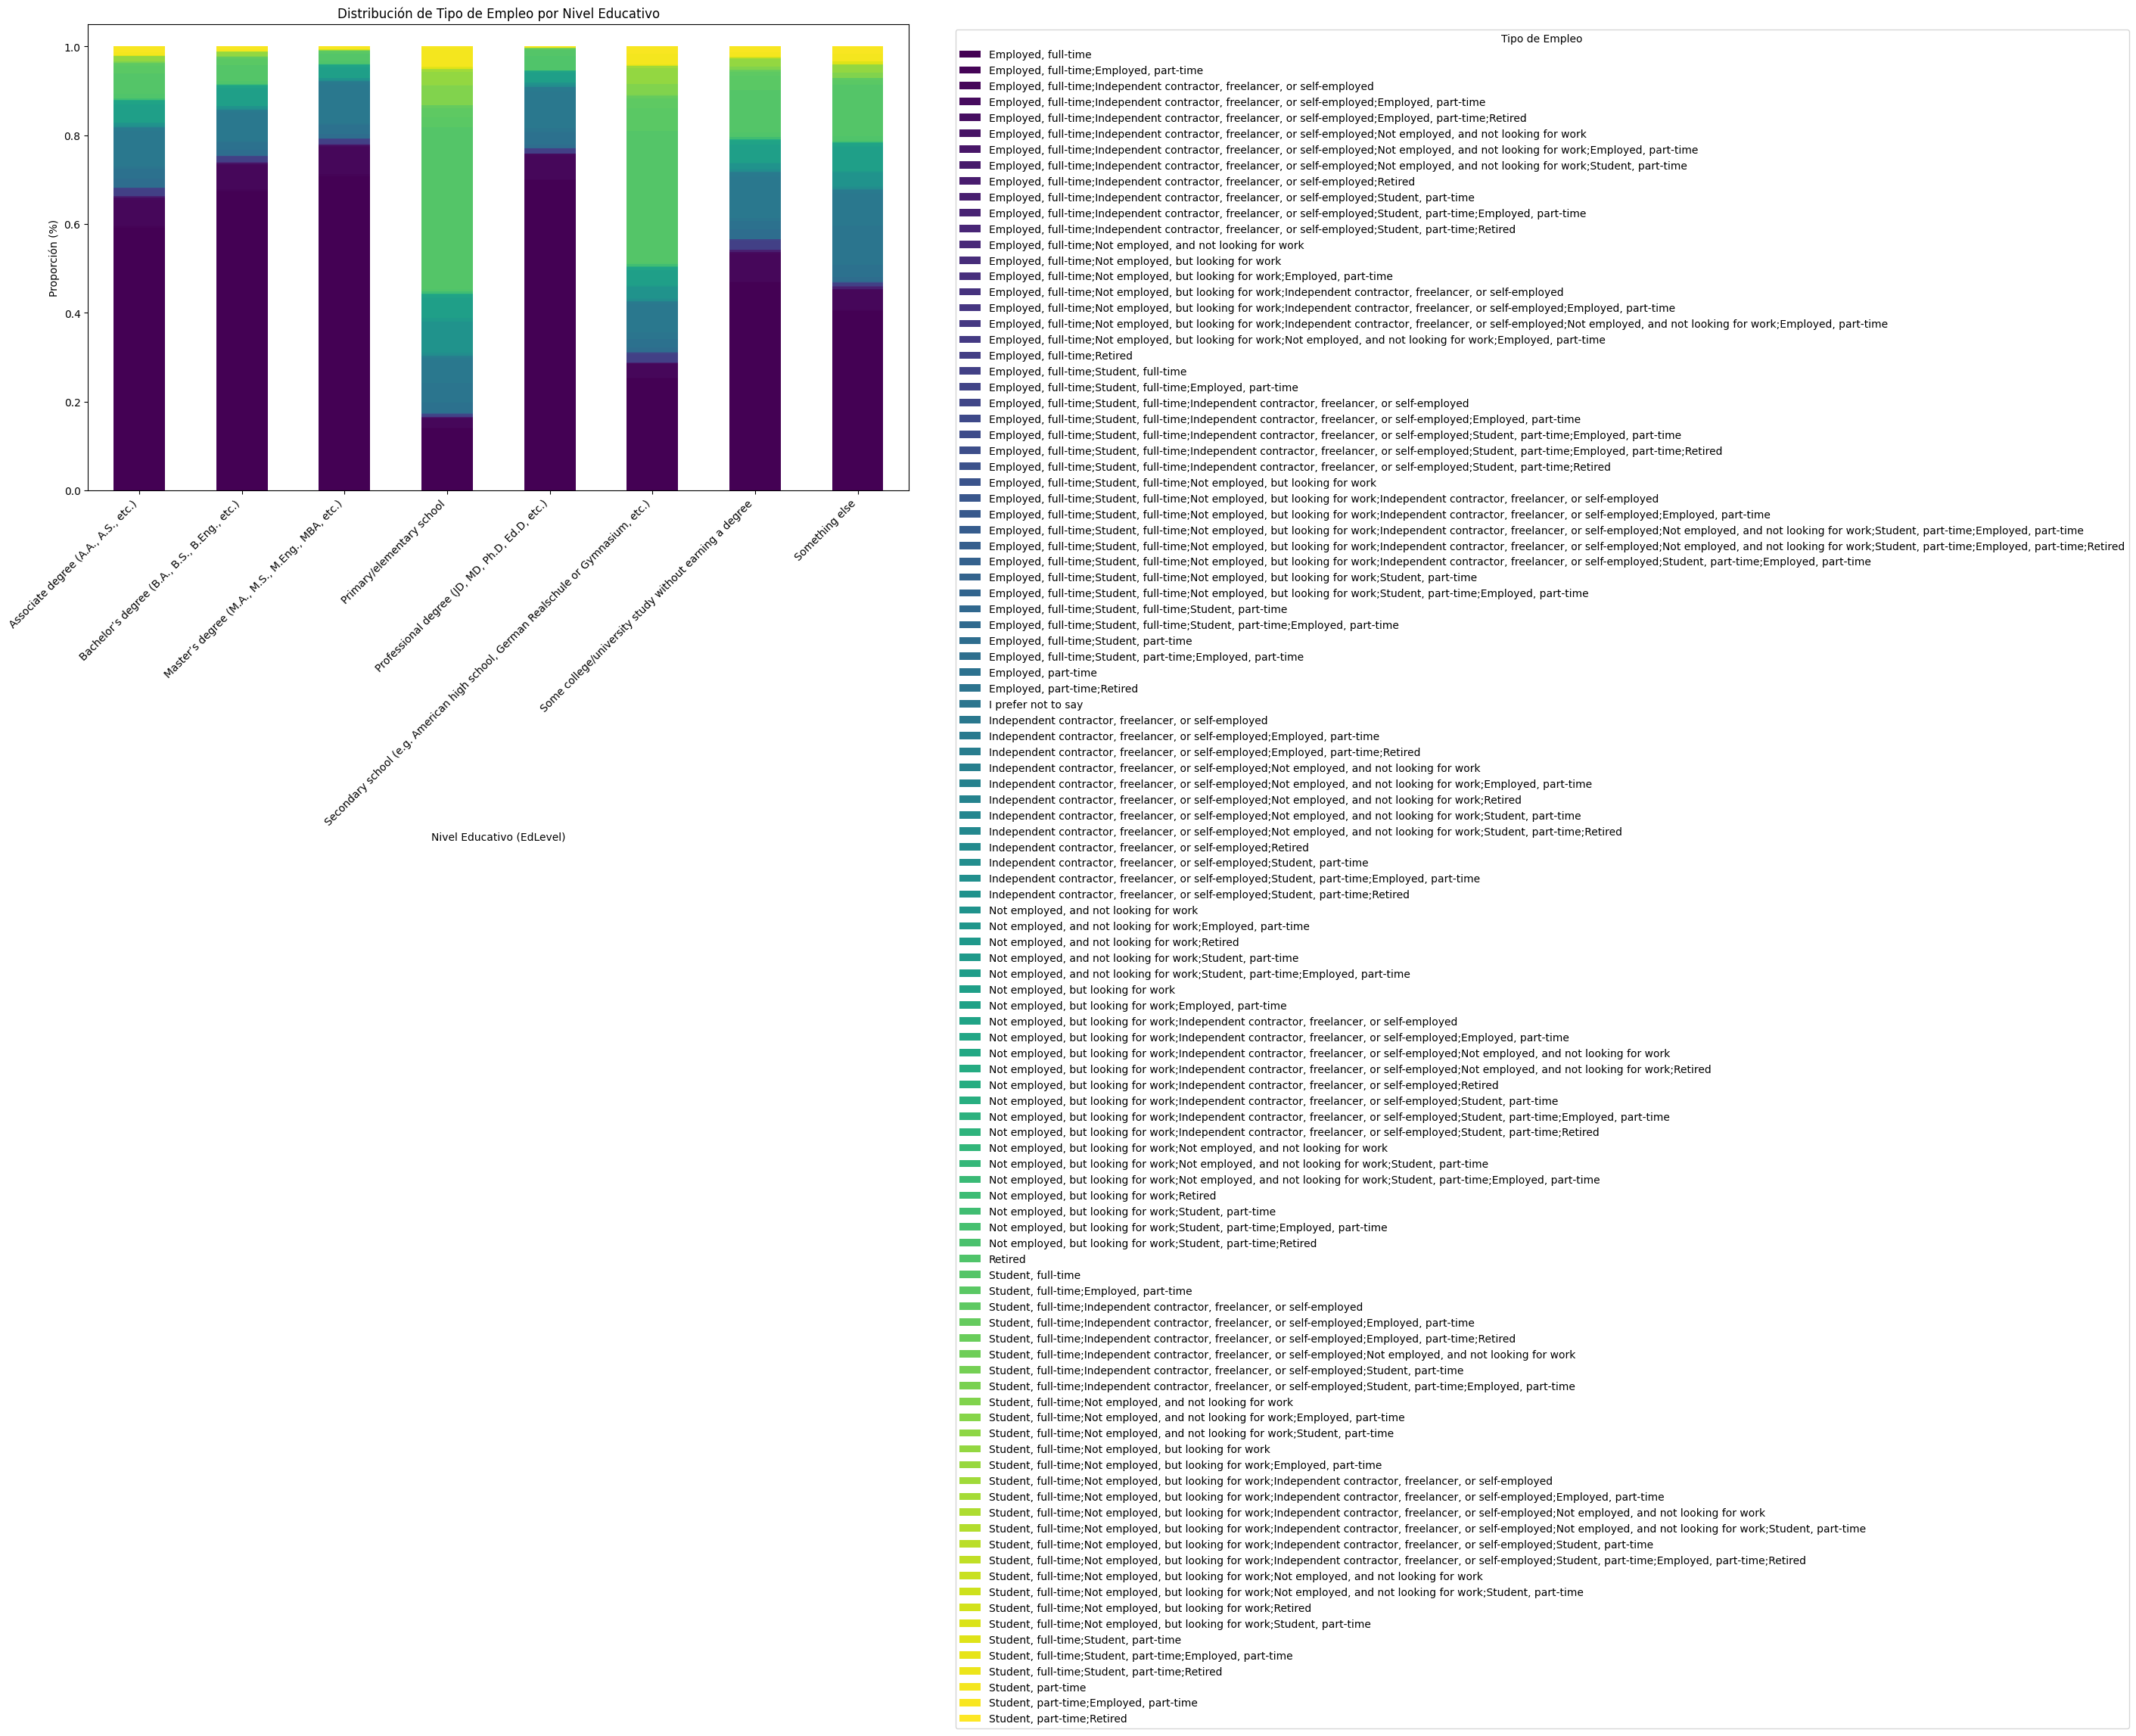

In [22]:
plt.figure(figsize=(12, 7))
edu_emp_ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))

plt.title('Distribución de Tipo de Empleo por Nivel Educativo')
plt.xlabel('Nivel Educativo (EdLevel)')
plt.ylabel('Proporción (%)')
plt.legend(title='Tipo de Empleo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [24]:
# Guarda el DataFrame en formato CSV
df.to_csv('survey_cleaned_analyzed.csv', index=False)

# Confirmación
print("✅ Dataset guardado como 'survey_cleaned_analyzed.csv'")

✅ Dataset guardado como 'survey_cleaned_analyzed.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
